In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
def count_above_threshold(df, threshold):
    ''' 
    For the count of true positives, it increments a counter if the score of at least one candidate for the same mass 
    (masses will be identified with an ID) is above a threshold. In case there are more than one candidate for the same
    mass with a score above the threshold, only one will be counted.

    Args:
        df (pandas.DataFrame): a dataframe that contains the scores obtained for each candidate and the ID
        threshold (float): the threshold to be applied to the scores
    Output:
        counter (int): the counter of values above the threshold taking into account the IDs
    '''
    counter = 0
    previous_image_id = None
    found_above_threshold = False

    for _, row in df.iterrows():
        current_image_id = row['image_id']
        current_score = row['#SCORE']

        if current_image_id != previous_image_id:
            if found_above_threshold:
                counter += 1
            found_above_threshold = False

        if current_score > threshold:
            found_above_threshold = True

        previous_image_id = current_image_id

    if found_above_threshold:
        counter += 1

    return counter

In [42]:
def build_froc_curve(df_positives, df_negatives, num_negative_imgs, num_true_masses, num_thresholds):
    ''' 
    Builds and plots the Free-Response Receiver Operating Characteristic (FROC) curve.

    Args:
        df_positives (pandas.DataFrame): dataframe that contains the scores and the image_ids for the positive candidates
        df_negatives (pandas.DataFrame): dataframe that contains the scores and the image_ids for the negative candidates
        num_negative_imgs (int): total number of negative images
        num_true_masses (int): total number of true masses
        num_thresholds (int): number of thresholds to consider for building the FROC curve
    Outputs:
        None
    '''

    # Calculate the number of true positive (TP) and false positive (FP) at different thresholds
    thresholds = np.linspace(0, 1, num_thresholds)
    tp = np.zeros(num_thresholds)
    fp = np.zeros(num_thresholds)

    for i, threshold in enumerate(thresholds):
        # Obtain the total number of true positives
        tp[i] = count_above_threshold(df_positives,threshold)

        # Obtain the total number of false positives
        df_negatives['Thresholded_Scores'] = (df_negatives['#SCORE'] > threshold).astype(int)
        count_ones = df_negatives['Thresholded_Scores'].sum()
        fp[i] = count_ones

    print(tp)
    print(fp)

    # Calculate the sensitivity (TPR) and average number of false positives per image (FPavg)
    tpr = tp / num_true_masses
    fp_avg = fp / num_negative_imgs

    # Plot the FROC curve
    plt.figure(1)
    plt.plot(fp_avg, tpr, marker='o')
    plt.xlabel('Average Number of False Positives per Image (FPavg)')
    plt.ylabel('Sensitivity (True Positive Rate, TPR)')
    plt.title('FROC Curve')
    plt.grid(True)

    # Plot the FROC curve until FP average per image is 1:
    # Find the indices where 'fp_avg' is less than or equal to 1
    indices = [i for i, val in enumerate(fp_avg) if val <= 2]

    # Filter 'fp_avg' and 'tpr' lists based on the indices
    filtered_fp_avg = [fp_avg[i] for i in indices]
    filtered_tpr = [tpr[i] for i in indices]

    # Plot the filtered points
    plt.figure(2)
    plt.plot(filtered_fp_avg, filtered_tpr, marker='o')
    plt.xlabel('Average Number of False Positives per Image (FPavg)')
    plt.ylabel('Sensitivity (True Positive Rate, TPR)')
    plt.title('FROC Curve')
    plt.grid(True)
    plt.show()


[114. 114. 114. 113. 113. 113. 112. 110. 109. 109. 109. 108. 107. 107.
 107. 106. 106. 105. 105. 105. 105. 103. 101. 101. 100.  99.  98.  98.
  97.  96.  94.  92.  89.  88.  86.  84.  83.  81.  79.  79.  79.  79.
  77.  74.  71.  67.  64.  64.  62.  60.  59.  57.  55.  55.  52.  50.
  47.  44.  42.  41.  41.  34.  33.  31.  28.  26.  23.  22.  20.  19.
  19.  18.  17.  17.  16.  12.  10.   8.   8.   7.   5.   5.   5.   4.
   3.   3.   2.   2.   2.   1.   1.   1.   0.   0.   0.   0.   0.   0.
   0.   0.]
[2.2347e+04 2.1404e+04 2.0803e+04 2.0201e+04 1.9552e+04 1.8908e+04
 1.8280e+04 1.7635e+04 1.6975e+04 1.6329e+04 1.5666e+04 1.5021e+04
 1.4367e+04 1.3717e+04 1.3074e+04 1.2505e+04 1.1936e+04 1.1273e+04
 1.0695e+04 1.0148e+04 9.6270e+03 9.1490e+03 8.7000e+03 8.2640e+03
 7.8230e+03 7.3550e+03 6.9090e+03 6.5120e+03 6.0870e+03 5.7190e+03
 5.3760e+03 5.0320e+03 4.7140e+03 4.4160e+03 4.1460e+03 3.8380e+03
 3.5510e+03 3.3410e+03 3.1130e+03 2.9040e+03 2.7260e+03 2.5640e+03
 2.3980e+03 2.2240e+03

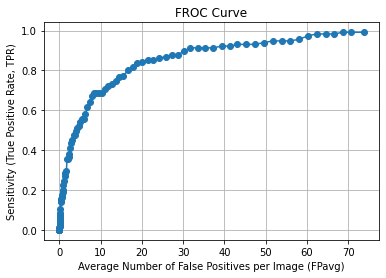

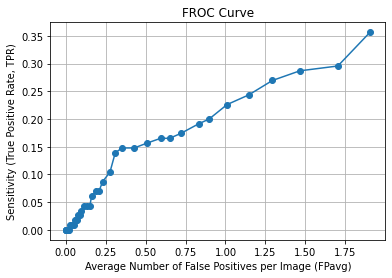

In [55]:
negative_df = pd.read_csv('/Users/clara/Desktop/MAIA/AIA/SVM_SEL/SVM_SEL_5_neg_02.csv')
positive_df = pd.read_csv('/Users/clara/Desktop/MAIA/AIA/SVM_SEL/SVM_SEL_5_pos_02.csv')
features_df = pd.read_csv('/Users/clara/Desktop/MAIA/AIA/features_merged_02_scaledTogether.csv')

# # Create 'positives' dataframe with rows where 'Label' is equal to 1
positives_features = features_df[features_df['Label'] == 1].copy()
image_id_positives = positives_features[['image_id']].copy()

# # Create 'negatives' dataframe with rows where 'Is_Positive' is equal to 0
negatives_features = features_df[features_df['Is_Positive'] == 0].copy()
image_id_negatives = negatives_features[['image_id']].copy()

#print(negative_df.shape)
#print(image_id_negatives.shape)

# Reset the index of the second dataframe to match the number of rows
image_id_positives = image_id_positives.reset_index(drop=True)
image_id_negatives = image_id_negatives.reset_index(drop=True)

positive_df = pd.concat([positive_df, image_id_positives], axis=1)
negative_df = pd.concat([negative_df, image_id_negatives], axis=1)

#print(negative_df.shape)

# Delete the first column
positive_df = positive_df.drop(positive_df.columns[0], axis=1)
negative_df = negative_df.drop(negative_df.columns[0], axis=1)


build_froc_curve(positive_df, negative_df, num_negative_imgs=303, num_true_masses=115, num_thresholds=100)